In [35]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

import seaborn as sns

In [36]:
data=pd.read_csv("G:\Dataset.csv")
dataset=pd.DataFrame(data)
#print(dataset.head())
print(len(dataset))

21120


In [37]:
dataset = dataset.drop('Station Names',axis=1)

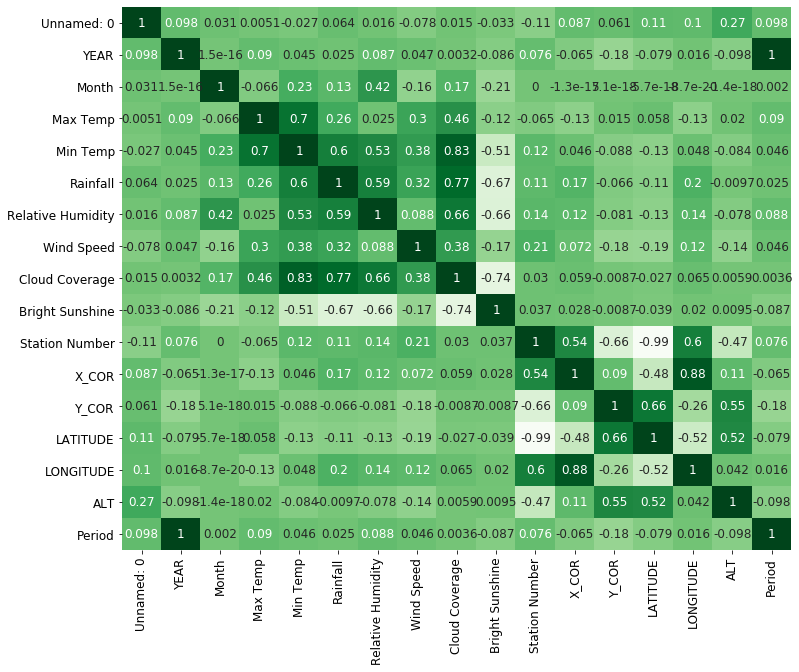

Rainfall           1.000000
Cloud Coverage     0.766821
Bright Sunshine    0.673333
Name: Rainfall, dtype: float64


In [38]:
features = pd.DataFrame(dataset)

plt.figure(figsize=(12,10))
cor = features.corr()
sns.heatmap(cor, annot=True, cbar=False, cmap=plt.cm.Greens)
plt.show()

cor_target = abs(cor["Rainfall"])
relevant_features = cor_target[cor_target>0.6]#.sort_values(ascending=False)

print(relevant_features)

In [39]:
newX = pd.DataFrame()
# newX['Min Temp'] = X['Min Temp']
# newX['Relative Humidity'] = X['Relative Humidity']
newX['Cloud Coverage'] = X['Cloud Coverage']
newX['Bright Sunshine'] = X['Bright Sunshine']

print(newX.head())

   Cloud Coverage  Bright Sunshine
0             0.6         7.831915
1             0.8         7.831915
2             0.6         7.831915
3             1.0         7.831915
4             1.6         7.831915


In [40]:
X=dataset.drop('Rainfall',axis=1)
print(newX[0:3]) # check 
Y=dataset['Rainfall']


   Cloud Coverage  Bright Sunshine
0             0.6         7.831915
1             0.8         7.831915
2             0.6         7.831915


In [50]:
X_train,X_test,y_train,y_test=train_test_split(newX,Y,test_size=0.3,random_state=3)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

14784 14784
6336 6336


In [51]:
lasso = Lasso()
split_data()
lasso.fit(X_train, y_train)

14784 14784
6336 6336


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
lasso = Lasso(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
                        # restricted and in this case linear and ridge regression resembles
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
def lasso_regression_train():
    lasso = Lasso(alpha=100) #  comparison with alpha value
    lasso.fit(X_train, y_train)
    
def lasso_regresson_test():
    Ridge_train_score = lasso.score(X_train,y_train)
    Ridge_test_score= lasso.score(X_test, y_test)

In [57]:
train_score=lasso.score(X_train, y_train)
test_score=lasso.score(X_test, y_test)

In [58]:
Ridge_train_score = lasso.score(X_train,y_train)
Ridge_test_score = lasso.score(X_test, y_test)

In [60]:
print ("linear regression train score           :", train_score)
print ("linear regression test score            :", test_score)
print ("ridge regression train score low alpha  :", Ridge_train_score)
print ("ridge regression test score low alpha   :", Ridge_test_score)

linear regression train score           : 0.61278532764515
linear regression test score            : 0.6137641853496092
ridge regression train score low alpha  : 0.61278532764515
ridge regression test score low alpha   : 0.6137641853496092


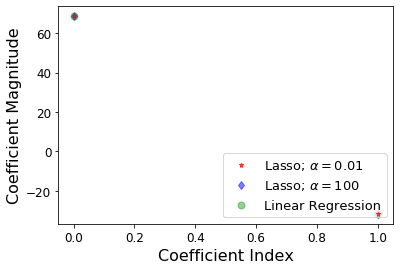

In [61]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 100$') # alpha here is for transparency
plt.plot(lasso.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()